In [1]:
import cv2
import numpy as np
from scipy.ndimage import sobel
from scipy.ndimage import gaussian_filter, uniform_filter
from scipy.ndimage import maximum_filter
from matplotlib import pyplot as plt

In [2]:
def compute_derivatives(image):

    img_gaussian = cv2.GaussianBlur(image, (3, 3), 0.5, borderType=cv2.BORDER_REFLECT)
    sobel_x = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3, borderType=cv2.BORDER_REFLECT)
    sobel_y = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3, borderType=cv2.BORDER_REFLECT)

    return sobel_x, sobel_y

def compute_orientation(sobel_x, sobel_y):
    # Compute orientation in degrees at each pixel
    orientation = np.arctan2(sobel_y, sobel_x) * 180 / np.pi
    return orientation

In [19]:
def compute_harris_matrix(image, window_size = 5):
    # Compute x and y derivatives
    sobel_x, sobel_y = compute_derivatives(image)
    height, width = image.shape

    print("kasjkajshdkajshdkasjhdkasjhdkasjhdkasjdhd")


    # Compute Gaussian filter for weights
    gaussian_mask = gaussian_filter(np.ones((5, 5)), sigma=0.5)

    kern = cv2.getGaussianKernel(5, 0.5)

    gaussian_mask = kern*kern.T

    Ix2 = np.square(sobel_x)
    Iy2 = np.square(sobel_y)
    Ixy = sobel_x * sobel_y 

    R_matrix = np.zeros((height,width))

    window = window_size//2

    for y in range(window, height - window):
        for x in range(window, width - window):

            wIx2 = np.sum((Ix2[y - window : y + window+1, x - window : x + window+1])*gaussian_mask)
            wIy2 = np.sum((Iy2[y - window : y + window+1, x - window : x + window+1])*gaussian_mask)
            wIxy = np.sum((Ixy[y - window : y + window+1, x - window : x + window+1])*gaussian_mask)


            M = np.array([[wIx2,wIxy],[wIxy,wIy2]])


            det = np.linalg.det(M)
            tr = np.matrix.trace(M)
            R = det - 0.05*(tr**2)
            R_matrix[y-2, x-2]=R

    return R_matrix

def find_maxima(img, R_matrix, threshold): 

    height = img.shape[0]   #.shape[0] outputs height 
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image

    # Normalize R_matrix
    R_matrix_normalized  = cv2.normalize(R_matrix, None, 0, 1, cv2.NORM_MINMAX)


    # Use maximum_filter to find local maxima
    thresholded_matrix_R = R_matrix_normalized  > threshold
    local_maxima = maximum_filter(thresholded_matrix_R, size=7) == thresholded_matrix_R
    
    dx, dy = compute_derivatives(img)
    orientations = compute_orientation(dx, dy)

    keypoints = []
    # Iterate over local maxima
    for y in range(2, height-2):
        for x in range(2, width-2):
            if local_maxima[y, x]:
                value = R_matrix_normalized [y, x]
                # Check if value exceeds threshold
                if value > threshold:
                    # Draw circle at local maximum
                    # cv2.circle(img, (x, y), 3, (0, 255, 0))
                    keypoints.append((x, y, orientations[y, x]))
            # print(orientations[y,x])

    # Convert OpenCV KeyPoint objects
    kp_orb = [cv2.KeyPoint(x, y, size=7, angle=orientation) for x, y, orientation in keypoints]
       
    return kp_orb


In [32]:
def HarrisPointsDetector(image, threshold= 0.83):
    if type(image) == str:
        image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

    print("kajhkasjdhkasjdhaksjhdaskjdhaskjdhaskdjhaaksjdkasjdhaksjdhaskdjhaskdjh")

    # plt.imshow(image)
    # plt.show()

    R_matrix = compute_harris_matrix(image)
    # print(R_matrix)
    kps = find_maxima(image, R_matrix, threshold)
    return kps
    

kajhkasjdhkasjdhaksjhdaskjdhaskjdhaskdjhaaksjdkasjdhaksjdhaskdjhaskdjh
kasjkajshdkajshdkasjhdkasjhdkasjhdkasjdhd


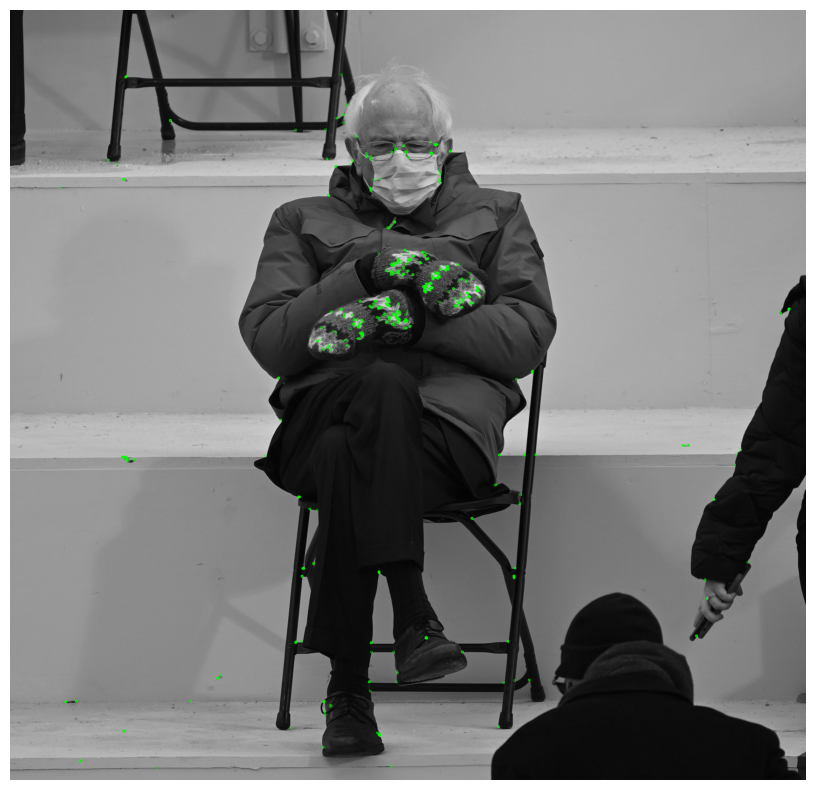

In [33]:
img = cv2.imread('bernieSanders.jpg', cv2.IMREAD_GRAYSCALE)

kp = HarrisPointsDetector(img)

# print(len(kp))

# Initialize ORB detector
orb = cv2.ORB_create()

# Compute descriptors for keypoints
keypoints, descriptors = orb.compute(img, kp)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0,255,0), flags=0)

plt.figure(figsize=(20, 10))
plt.imshow(img_with_keypoints)
plt.axis('off')
plt.show()

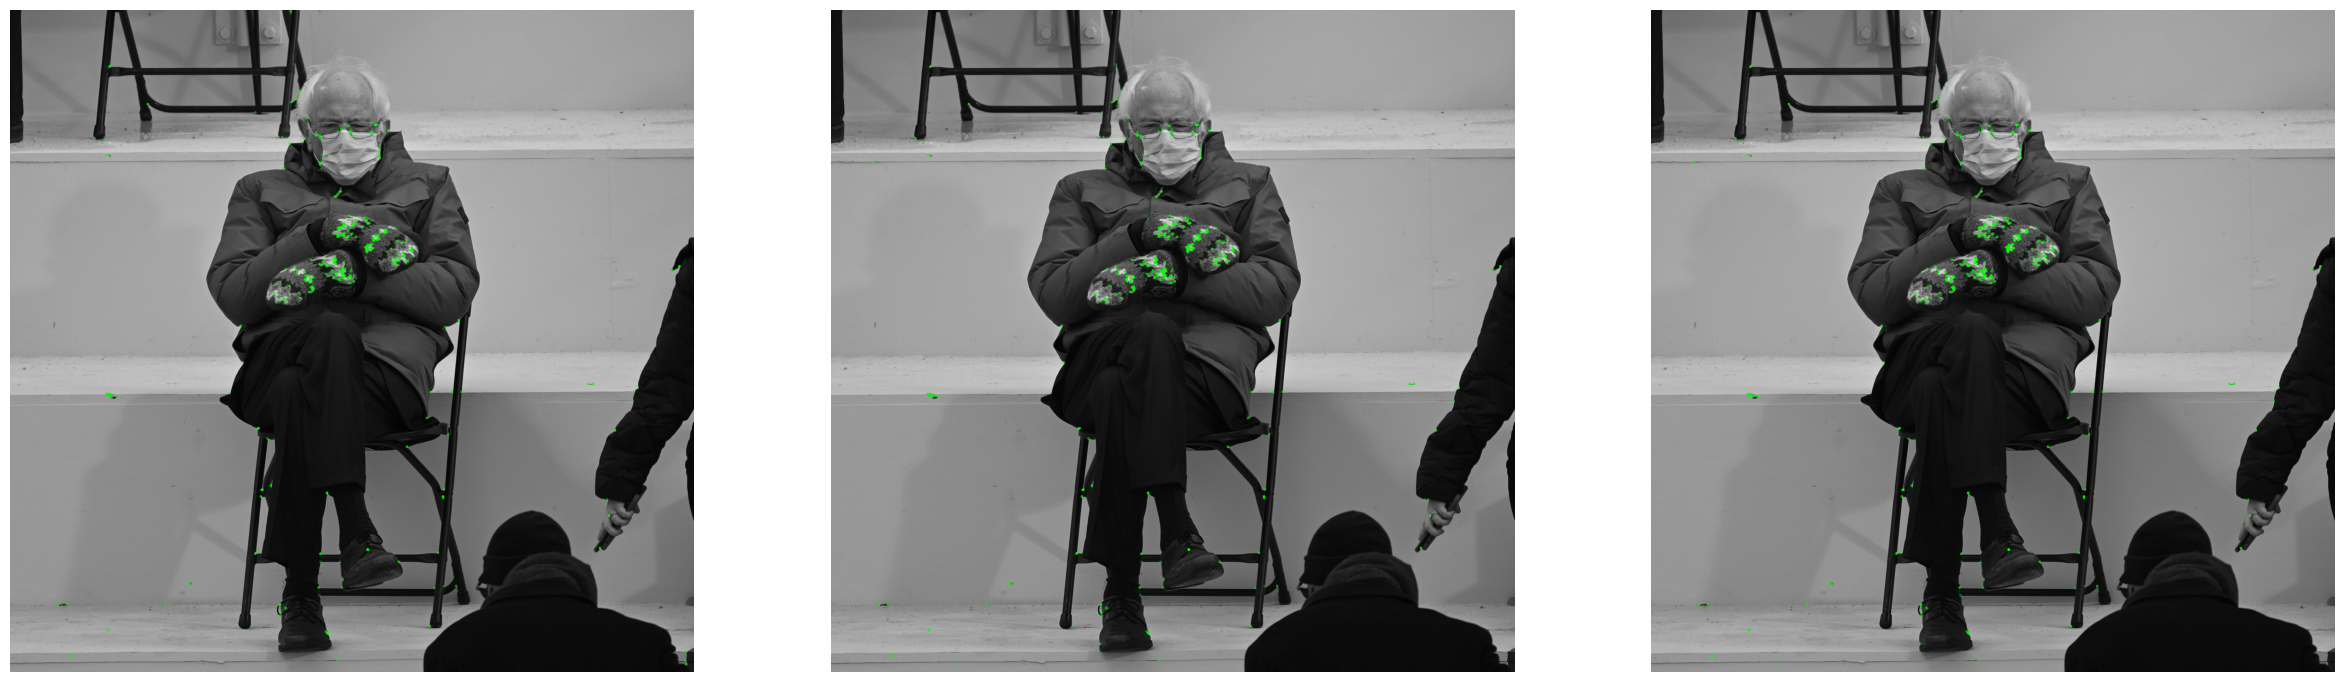

In [48]:
# Draw keypoints on the image
img_with_keypoints_har = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

# Compute descriptors for keypoints
keypointsorb, descriptors = orb.compute(img, kp)
# Draw keypoints on the image
img_with_keypoints_orb = cv2.drawKeypoints(img, keypointsorb, None, color=(0,255,0), flags=0)

kp_harris, des_harris = orb.compute(img, keypointsorb)

img_with_keypoints_orbdetect = cv2.drawKeypoints(img, kp_harris, None, color=(0,255,0), flags=0)

plt.figure(figsize=(30, 10))
plt.subplot(1, 3, 1)
plt.imshow(img_with_keypoints_har)
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(img_with_keypoints_orb)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_with_keypoints_orbdetect)
plt.axis('off')
plt.show()

In [6]:
img = cv2.imread('bernieSanders.jpg', cv2.IMREAD_GRAYSCALE)
R_matrix = compute_harris_matrix(img)


965


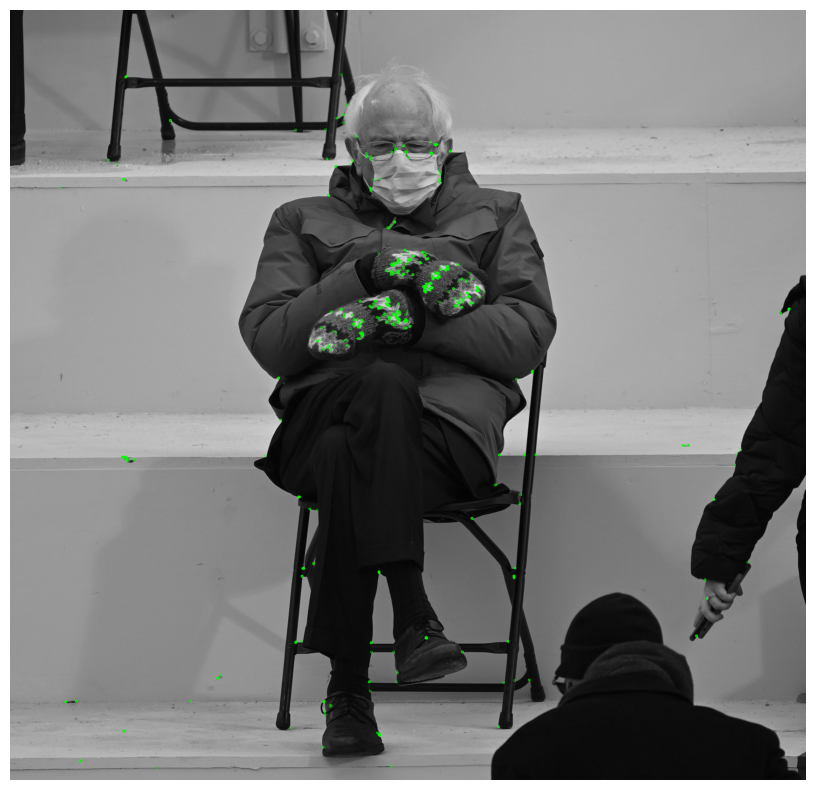

In [7]:
# Initialize ORB detector
orb = cv2.ORB_create()

kp = find_maxima(img, R_matrix, 0.83)

print(len(kp))

# Compute descriptors for keypoints
keypoints, descriptors = orb.compute(img, kp)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0,255,0), flags=0)

plt.figure(figsize=(20, 10))
plt.imshow(img_with_keypoints)
plt.axis('off')
plt.show()

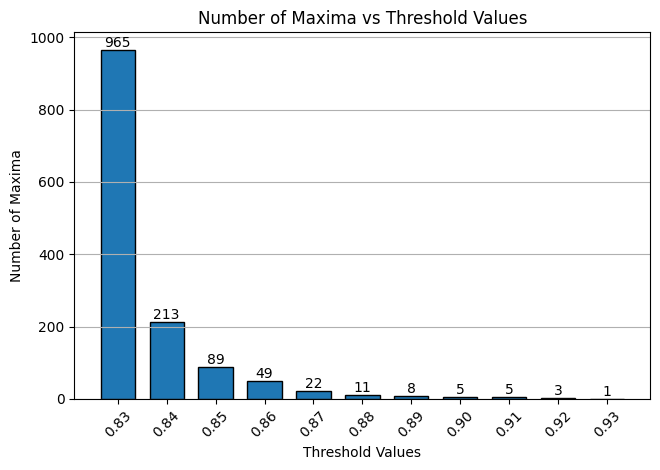

In [8]:
counts = []
for j in range(83, 94):
    i = j/100
    counts.append(len(find_maxima(img, R_matrix, i)))

# Generate floating-point values
values = [j / 100 for j in range(83, 94)]
# Plot
plt.bar(values, counts, width=0.007, align='center', edgecolor='black')  
plt.xlabel('Threshold Values')
plt.ylabel('Number of Maxima')
plt.title('Number of Maxima vs Threshold Values')
plt.grid(axis='y')  

# Add text annotations above each bar
for i in range(len(counts)):
    plt.text(values[i], counts[i], str(counts[i]), ha='center', va='bottom')
# plt.ylim(top=1000)
# plt.yticks(range(0, 801, 50))
plt.xticks(values, rotation=45)  
plt.tight_layout()  

# Adjust spacing between bars
plt.subplots_adjust(left=0.05, right=1-0.05)

plt.show()


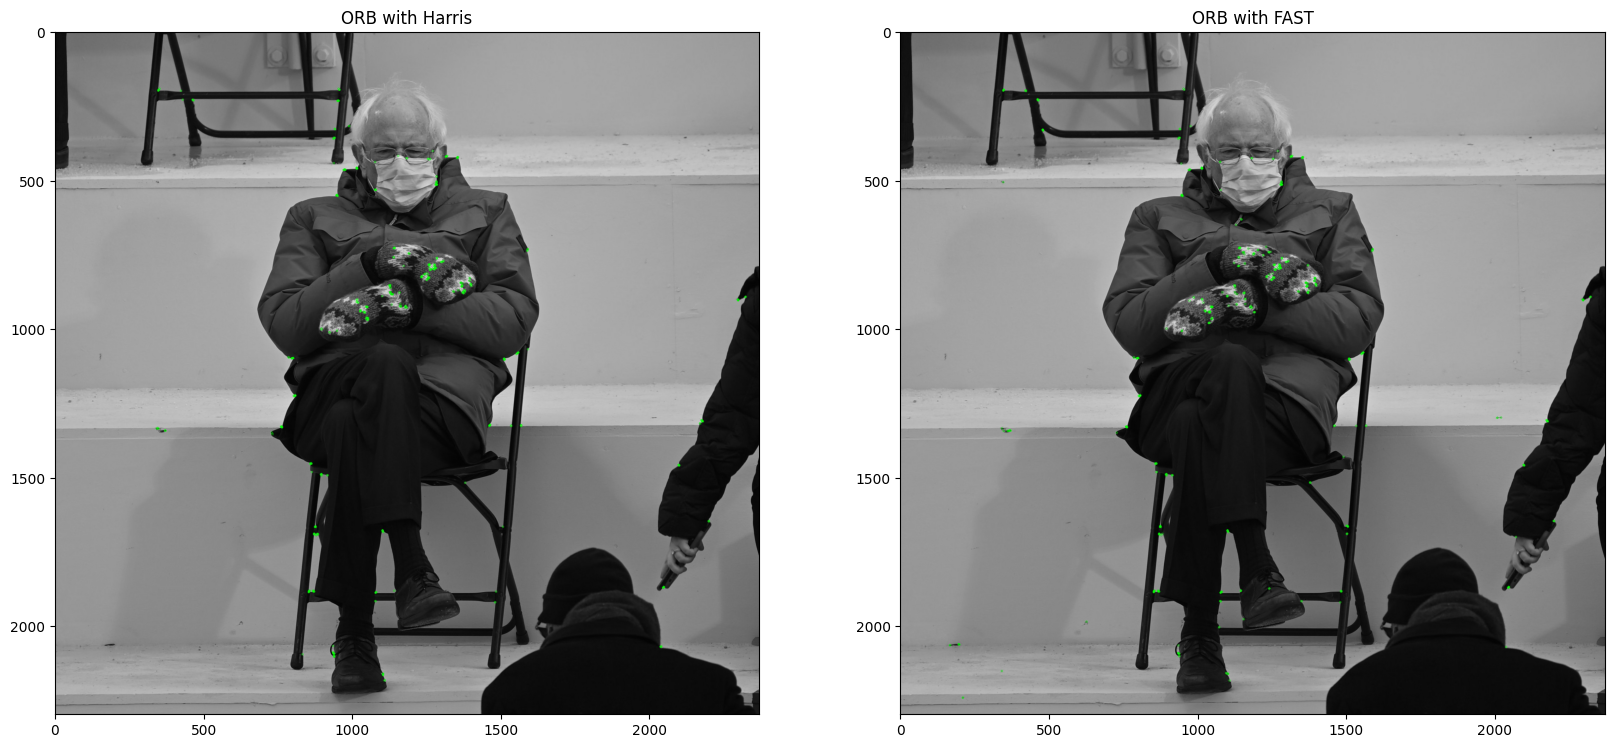

In [9]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load the image
img = cv.imread('bernieSanders.jpg', cv.IMREAD_GRAYSCALE)

# Initiate ORB detector with Harris corners
orb_harris = cv.ORB_create()

# Initiate ORB detector with FAST corners
orb_fast = cv.ORB_create(scoreType=cv.ORB_FAST_SCORE)

# Find the keypoints with ORB harris
kp_harris = orb_harris.detect(img, None)
# Find the keypoints with ORB fast
kp_fast = orb_fast.detect(img, None)

# Compute the descriptors with ORB
kp_harris, des_harris = orb_harris.compute(img, kp_harris)
# Compute the descriptors with ORB
kp_fast, des_fast = orb_fast.compute(img, kp_fast)

# Draw only keypoints location, not size and orientation
img_harris = cv.drawKeypoints(img, kp_harris, None, color=(0, 255, 0), flags=0)
# Draw only keypoints location, not size and orientation
img_fast = cv.drawKeypoints(img, kp_fast, None, color=(0, 255, 0), flags=0)

# Display the images side by side
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(img_harris, cmap='gray')
plt.title('ORB with Harris')

plt.subplot(1, 2, 2)
plt.imshow(img_fast, cmap='gray')
plt.title('ORB with FAST')

plt.show()

In [10]:
import numpy as np
from scipy.spatial.distance import cdist
import cv2

def SSDFeatureMatcher(descriptors1, descriptors2):
    matches = []
    distances = cdist(descriptors1, descriptors2, 'sqeuclidean')
    for i in range(len(descriptors1)):
        best_match_idx = np.argmin(distances[i])
        matches.append(cv2.DMatch(i, best_match_idx, distances[i][best_match_idx]))
    return matches

def RatioFeatureMatcher(descriptors1, descriptors2, ratio_threshold=0.7):
    matches = []
    distances = cdist(descriptors1, descriptors2, 'sqeuclidean')
    for i in range(len(descriptors1)):
        sorted_indices = np.argsort(distances[i])
        best_match_idx = sorted_indices[0]
        second_best_match_idx = sorted_indices[1]
        ratio = distances[i][best_match_idx] / distances[i][second_best_match_idx]
        if ratio < ratio_threshold:
            matches.append(cv2.DMatch(i, best_match_idx, distances[i][best_match_idx]))
    return matches

def visualize_matches(img1, keypoints1, img2, keypoints2, matches):
    # Draw matches
    img_matches = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches, None)
    
    # Convert BGR image to RGB (matplotlib expects RGB)
    img_rgb = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)
    
    # Display the matches using plt.imshow
    plt.figure(figsize=(20, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

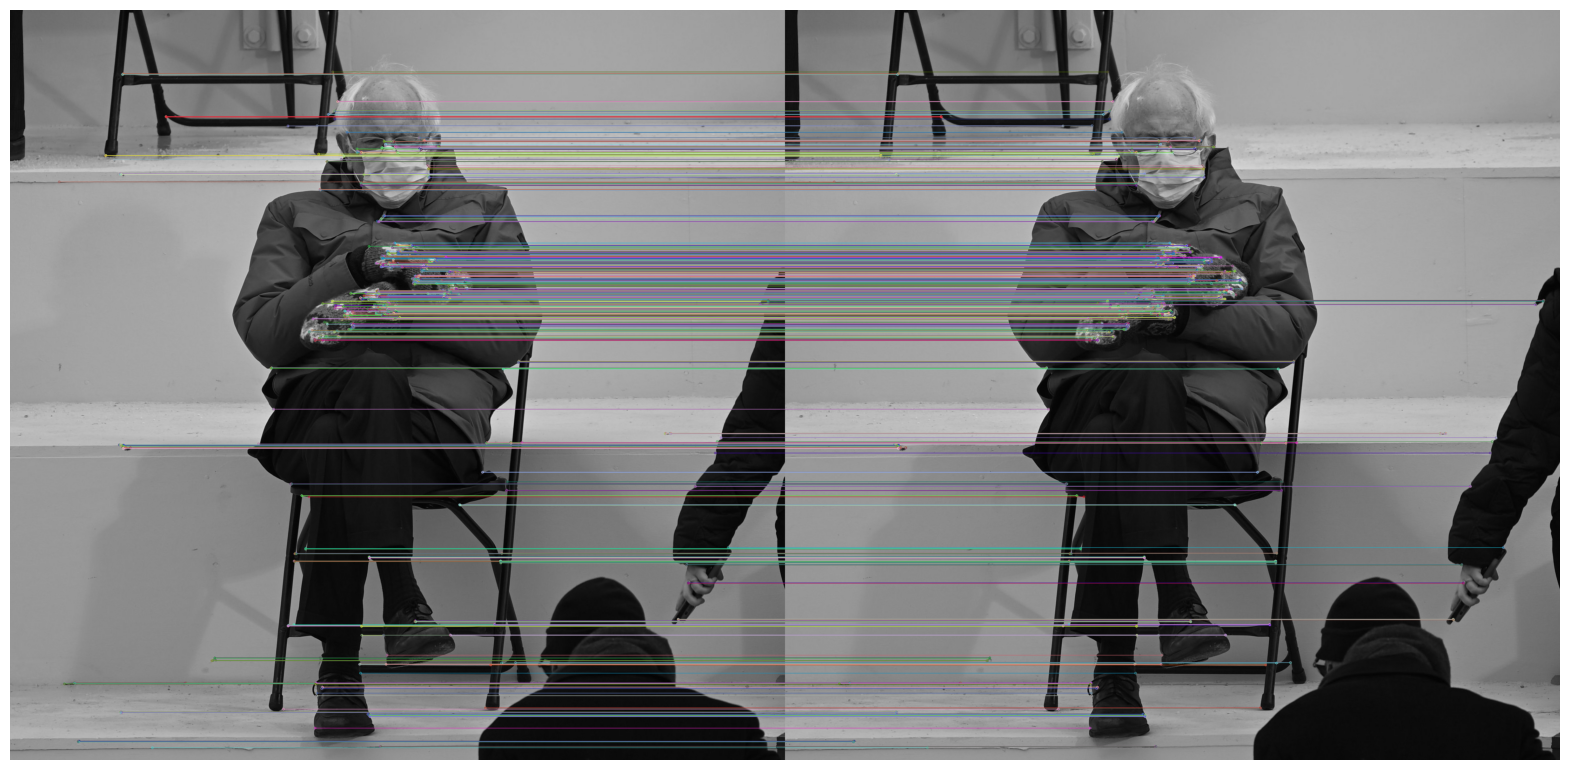

In [11]:
# matches = SSDFeatureMatcher(descriptors, descriptors)
# visualize_matches(image, keypoints, image, keypoints, matches)

matches = SSDFeatureMatcher(descriptors, descriptors)
visualize_matches(img, keypoints, img, keypoints, matches)


In [12]:
img1 = cv2.imread('bernieSanders.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('brighterBernie.jpg', cv2.IMREAD_GRAYSCALE)

kp1 = HarrisPointsDetector(img1, 0.83)
kp2 = HarrisPointsDetector(img2, 0.83)

print(len(kp1))
print(len(kp2))

965
790


953 781
953 781


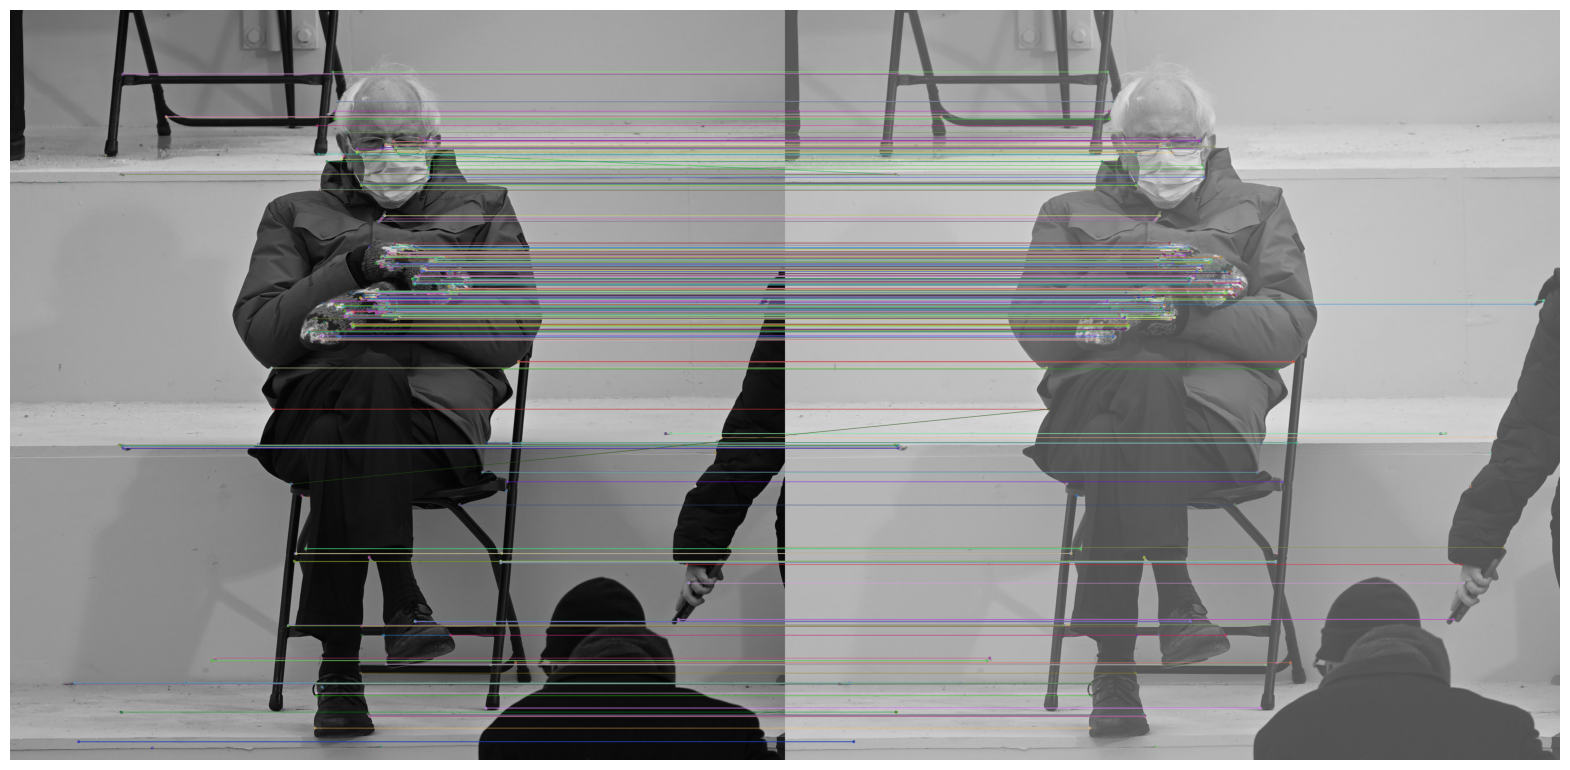

In [13]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Compute descriptors for keypoints
keypoints1, descriptors1 = orb.compute(img1, kp1)
keypoints2, descriptors2 = orb.compute(img2, kp2)

print(len(keypoints1), len(keypoints2))
print(len(descriptors1), len(descriptors2))

matches = RatioFeatureMatcher(descriptors1, descriptors2, 0.6)
visualize_matches(img1, keypoints1, img2, keypoints2, matches)

In [14]:
img2 = cv2.imread('brighterBernie.jpg', cv2.IMREAD_GRAYSCALE)
R_matrix2 = compute_harris_matrix(img2)

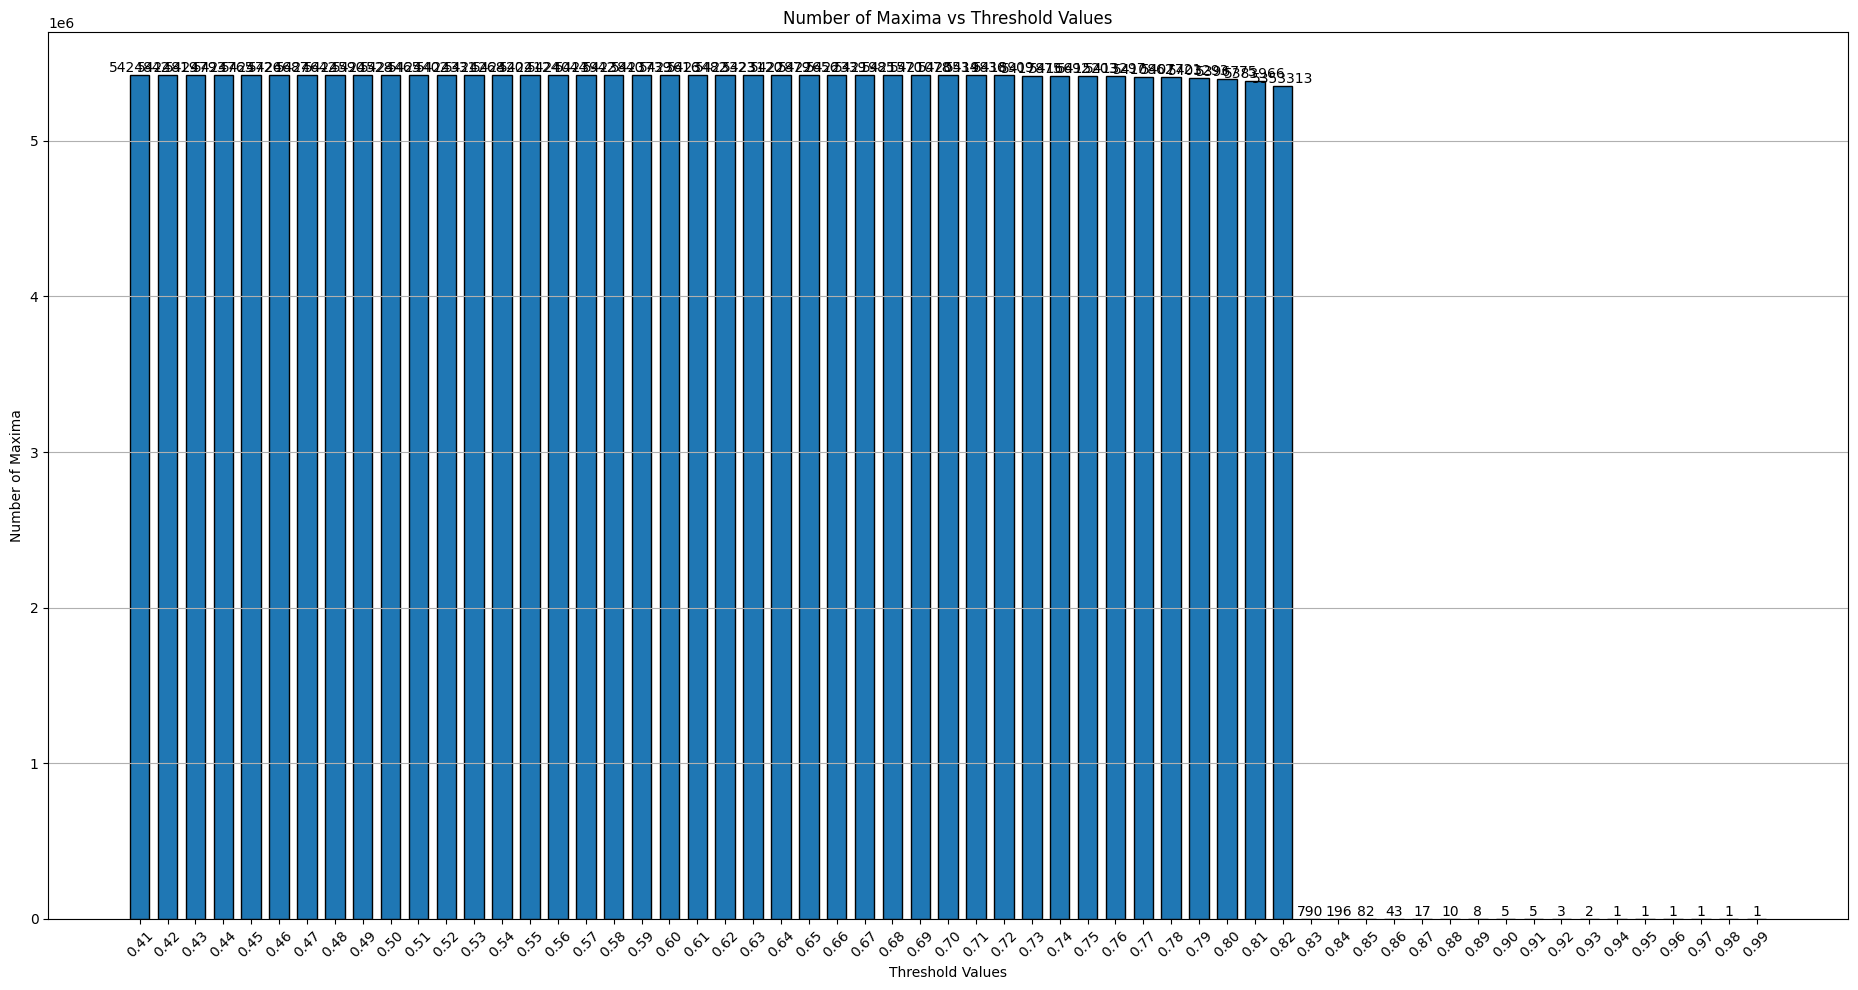

In [15]:
counts = []
for j in range(41, 100):
    i = j/100
    counts.append(len(find_maxima(img2, R_matrix2, i)))

# Generate floating-point values
values = [j / 100 for j in range(41, 100)]
# Plot
plt.figure(figsize=(20, 10))
plt.bar(values, counts, width=0.007, align='center', edgecolor='black')  
plt.xlabel('Threshold Values')
plt.ylabel('Number of Maxima')
plt.title('Number of Maxima vs Threshold Values')
plt.grid(axis='y')  

# Add text annotations above each bar
for i in range(len(counts)):
    plt.text(values[i], counts[i], str(counts[i]), ha='center', va='bottom')
# plt.ylim(top=1000)
# plt.yticks(range(0, 801, 50))
plt.xticks(values, rotation=45)  
plt.tight_layout()  

# Adjust spacing between bars
plt.subplots_adjust(left=0.05, right=1-0.05)

plt.show()

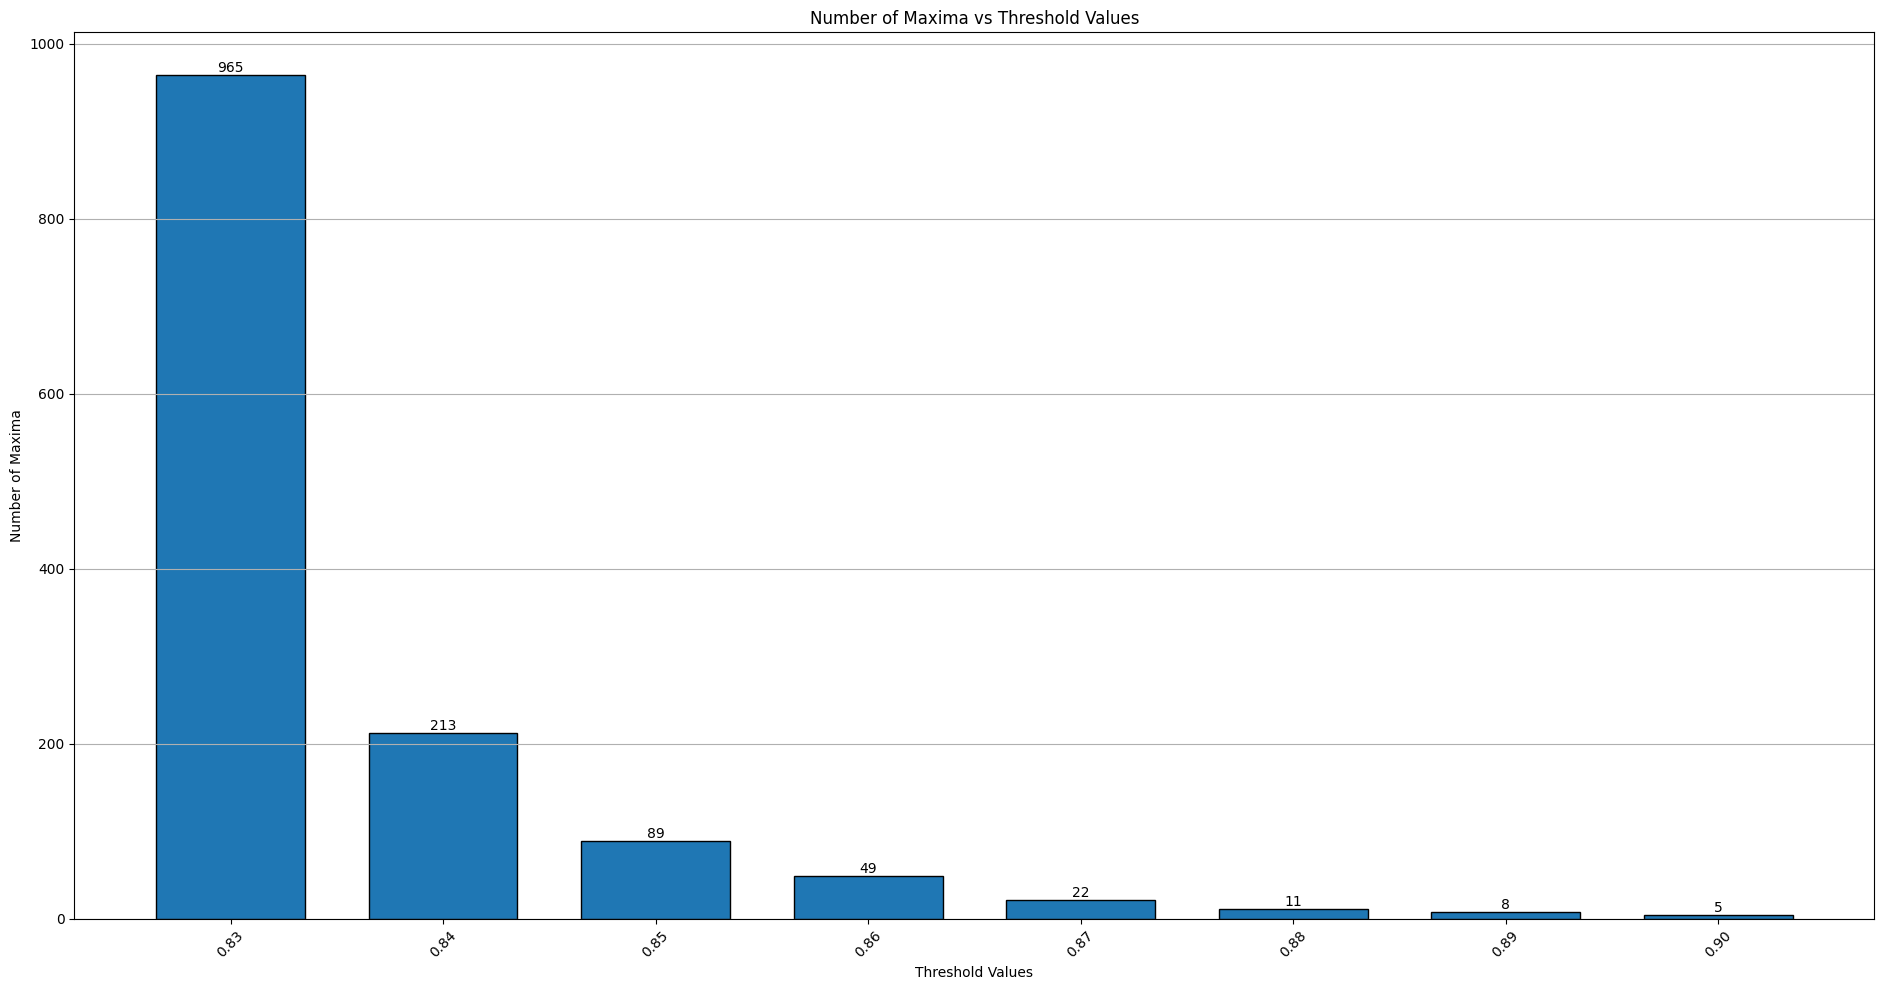

In [16]:
counts = []
for j in range(83, 91):
    i = j/100
    counts.append(len(find_maxima(img, R_matrix, i)))

# Generate floating-point values
values = [j / 100 for j in range(83, 91)]
# Plot
plt.figure(figsize=(20, 10))
plt.bar(values, counts, width=0.007, align='center', edgecolor='black')  
plt.xlabel('Threshold Values')
plt.ylabel('Number of Maxima')
plt.title('Number of Maxima vs Threshold Values')
plt.grid(axis='y')  

# Add text annotations above each bar
for i in range(len(counts)):
    plt.text(values[i], counts[i], str(counts[i]), ha='center', va='bottom')
# plt.ylim(top=1000)
# plt.yticks(range(0, 801, 50))
plt.xticks(values, rotation=45)  
plt.tight_layout()  

# Adjust spacing between bars
plt.subplots_adjust(left=0.05, right=1-0.05)

plt.show()

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def my_harris(img_dir,window_size,k,threshold):

    img = cv2.imread(img_dir)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    img_gaussian = cv2.GaussianBlur(gray,(3,3),0.5)

    # Check if the image is exists
    if img is None:
        print('Invalid image:' + img_dir)
        return None
    else:
        print('Image successfully read...')
        
    height = img.shape[0]   #.shape[0] outputs height 
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image
    matrix_R = np.zeros((height,width))
    
    #   Step 1 - Calculate the x e y image derivatives (dx e dy)
    dx = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)
    # dy, dx = np.gradient(gray)

    # Define Gaussian kernel
    gaussian_mask = gaussian_filter(np.ones((5, 5)), sigma=0.5)

    #   Step 2 - Calculate product and second derivatives (dx2, dy2 e dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
    #   Step 3 - Calcular a soma dos produtos das derivadas para cada pixel (Sx2, Sy2 e Sxy)
    print ("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):

            Sx2 = np.sum((dx2[y-offset:y+1+offset, x-offset:x+1+offset])*gaussian_mask)
            Sy2 = np.sum((dy2[y-offset:y+1+offset, x-offset:x+1+offset])*gaussian_mask)
            Sxy = np.sum((dxy[y-offset:y+1+offset, x-offset:x+1+offset])*gaussian_mask)

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #   Step 5 - Calculate the response function ( R=det(H)-k(Trace(H))^2 )
            det=np.linalg.det(H)
            tr=np.matrix.trace(H)
            R=det-k*(tr**2)
            matrix_R[y-offset, x-offset]=R

    return matrix_R


def compute_harris_matrix(image, window_size = 5):
    # Compute x and y derivatives
    sobel_x, sobel_y = compute_derivatives(image)
    height, width = image.shape


    # Compute Gaussian filter for weights
    gaussian_mask = gaussian_filter(np.ones((5, 5)), sigma=0.5)

    Ix2 = np.square(sobel_x)
    Iy2 = np.square(sobel_y)
    Ixy = sobel_x * sobel_y 

    R_matrix = np.zeros((height,width))

    window = window_size//2

    for y in range(window, height - window):
        for x in range(window, width - window):

            wIx2 = np.sum((Ix2[y - window : y + window+1, x - window : x + window+1])*gaussian_mask)
            wIy2 = np.sum((Iy2[y - window : y + window+1, x - window : x + window+1])*gaussian_mask)
            wIxy = np.sum((Ixy[y - window : y + window+1, x - window : x + window+1])*gaussian_mask)


            M = np.array([[wIx2,wIxy],[wIxy,wIy2]])


            det = np.linalg.det(M)
            tr = np.matrix.trace(M)
            R = det - 0.05*(tr**2)
            R_matrix[y-2, x-2]=R

    return R_matrix

img = cv.imread('bernieSanders.jpg', cv.IMREAD_GRAYSCALE)

# r = my_harris("bernieSanders.jpg", 5, 0.05, 0.25) 
r = compute_harris_matrix(img) 
# thresh("bernieSanders.jpg", r, 0.3)

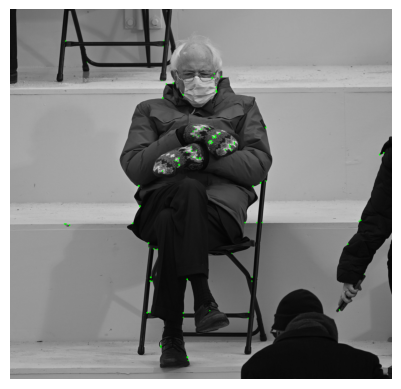

In [18]:


def thresh(img_dir, matrix_R, threshold): 

    img = cv2.imread(img_dir, cv.IMREAD_GRAYSCALE)

    height = img.shape[0]   #.shape[0] outputs height 
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image

    # Normalize matrix_R for visualization
    matrix_R = cv2.normalize(matrix_R, None, 0, 1, cv2.NORM_MINMAX)


    # Use maximum_filter to find local maxima
    thresholded_matrix_R = matrix_R > threshold
    local_maxima = maximum_filter(thresholded_matrix_R, size=7) == thresholded_matrix_R
    
    dx, dy = compute_derivatives(img)
    orientations = compute_orientation(dx, dy)

    keypoints = []
    # Iterate over local maxima
    for y in range(2, height-2):
        for x in range(2, width-2):
            if local_maxima[y, x]:
                value = matrix_R[y, x]
                # Check if value exceeds threshold
                if value > threshold:
                    # Draw circle at local maximum
                    # cv2.circle(img, (x, y), 3, (0, 255, 0))
                    keypoints.append((x, y, orientations[y, x]))

    # Convert OpenCV KeyPoint objects
    kp_orb = [cv2.KeyPoint(x, y, size=7, angle=orientation) for x, y, orientation in keypoints]
       
    return kp_orb

kp = thresh("bernieSanders.jpg", r, 0.3)

# Initialize ORB detector
orb = cv2.ORB_create()

# Compute descriptors for keypoints
keypoints, descriptors = orb.compute(img, kp)



# Draw keypoints on the image
img_with_keypoints = cv.drawKeypoints(img, keypoints, None, color=(0,255,0), flags=0)

# Plot the image with keypoints
plt.imshow(img_with_keypoints)
plt.axis('off')
plt.show()

In [19]:
import cv2
from scipy.ndimage import gaussian_filter

def gaussian_kernel_cv2(size, sigma):
    return cv2.getGaussianKernel(size, sigma)

# Example usage:
size = 5
sigma = 0.5
kernel_cv2 = gaussian_kernel_cv2(size, sigma)
kernel_2d = kernel_cv2*kernel_cv2.T
print(kernel_2d)

import scipy.ndimage
import numpy as np

def gaussian_kernel_scipy(size, sigma):
    return scipy.ndimage.gaussian_filter1d(np.eye(size), sigma, axis=0)

# Example usage:
size = 5
sigma = 1.0
kernel_scipy = gaussian_kernel_scipy(size, sigma)
print(kernel_scipy)
print(kernel_scipy.shape)
print(gaussian_filter(np.ones((5, 5)), sigma=0.5))

[[6.96247819e-08 2.80886418e-05 2.07548550e-04 2.80886418e-05
  6.96247819e-08]
 [2.80886418e-05 1.13317669e-02 8.37310610e-02 1.13317669e-02
  2.80886418e-05]
 [2.07548550e-04 8.37310610e-02 6.18693507e-01 8.37310610e-02
  2.07548550e-04]
 [2.80886418e-05 1.13317669e-02 8.37310610e-02 1.13317669e-02
  2.80886418e-05]
 [6.96247819e-08 2.80886418e-05 2.07548550e-04 2.80886418e-05
  6.96247819e-08]]
[[6.40914915e-01 2.95962573e-01 5.84229890e-02 4.56569224e-03
  1.33830625e-04]
 [2.95962573e-01 4.03375331e-01 2.42105276e-01 5.39911274e-02
  4.56569224e-03]
 [5.84229890e-02 2.42105276e-01 3.98943469e-01 2.42105276e-01
  5.84229890e-02]
 [4.56569224e-03 5.39911274e-02 2.42105276e-01 4.03375331e-01
  2.95962573e-01]
 [1.33830625e-04 4.56569224e-03 5.84229890e-02 2.95962573e-01
  6.40914915e-01]]
(5, 5)
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


hi


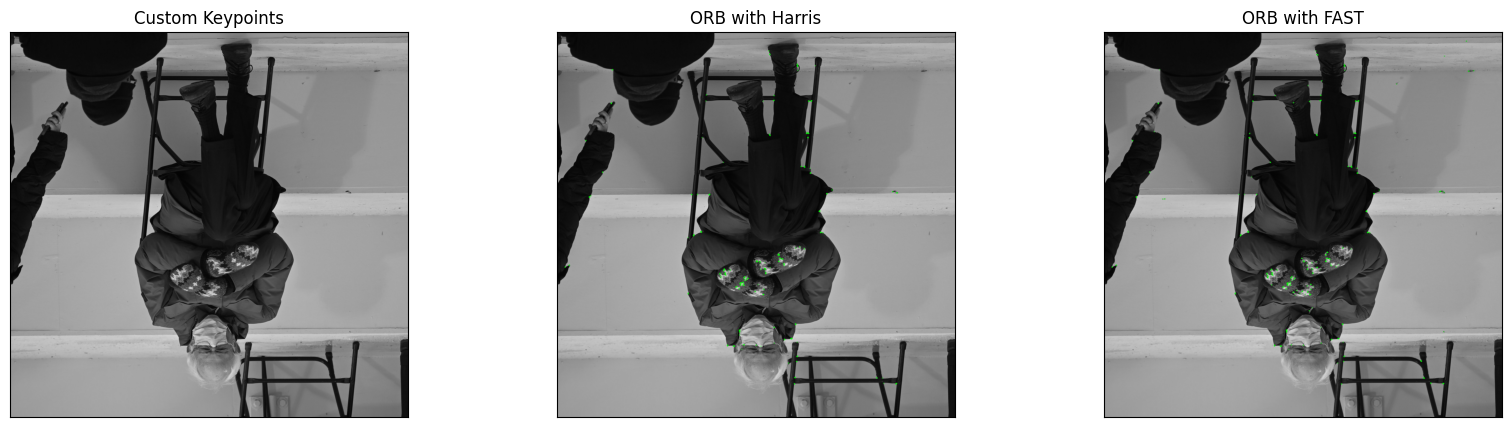

hi


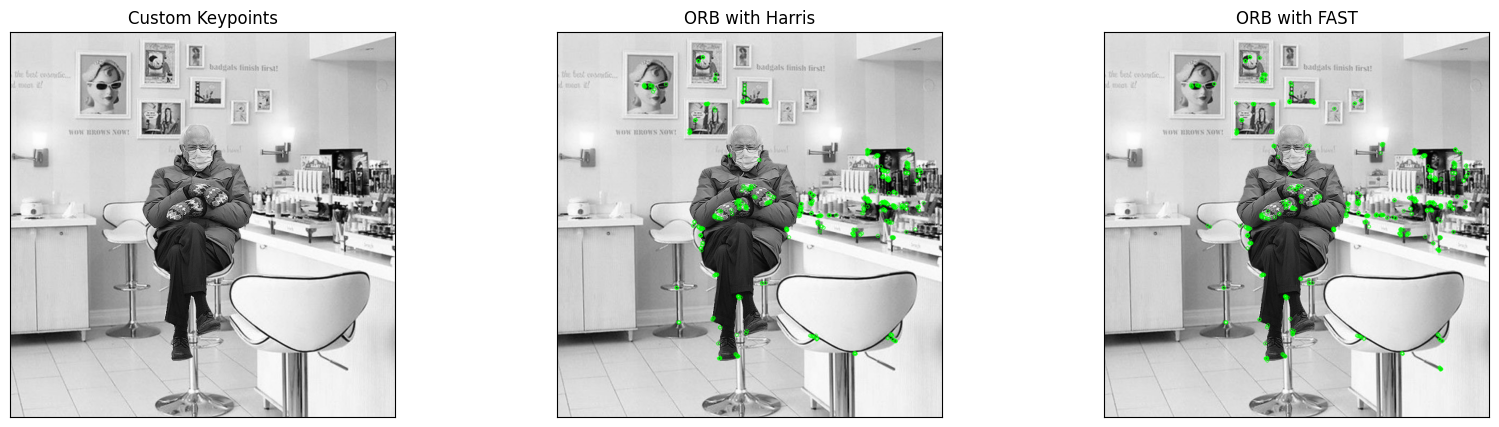

hi


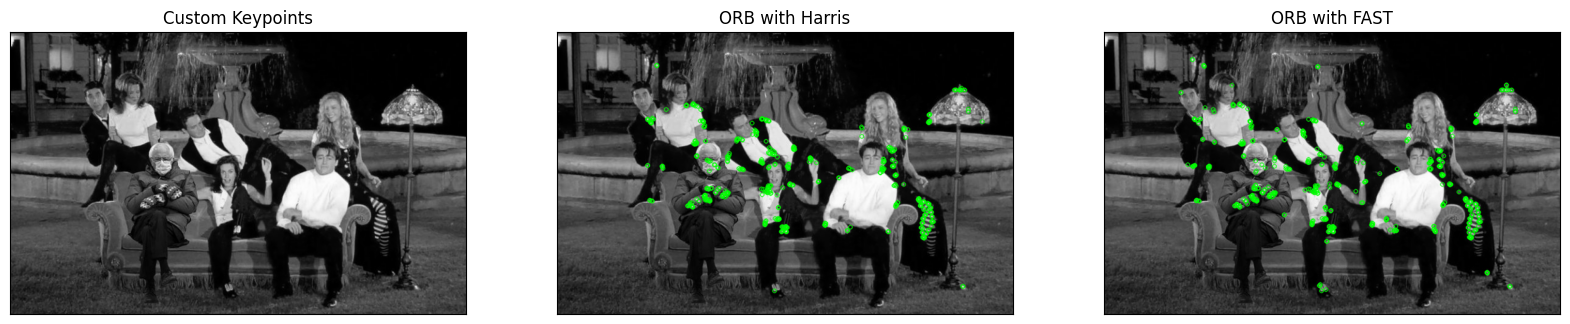

hi


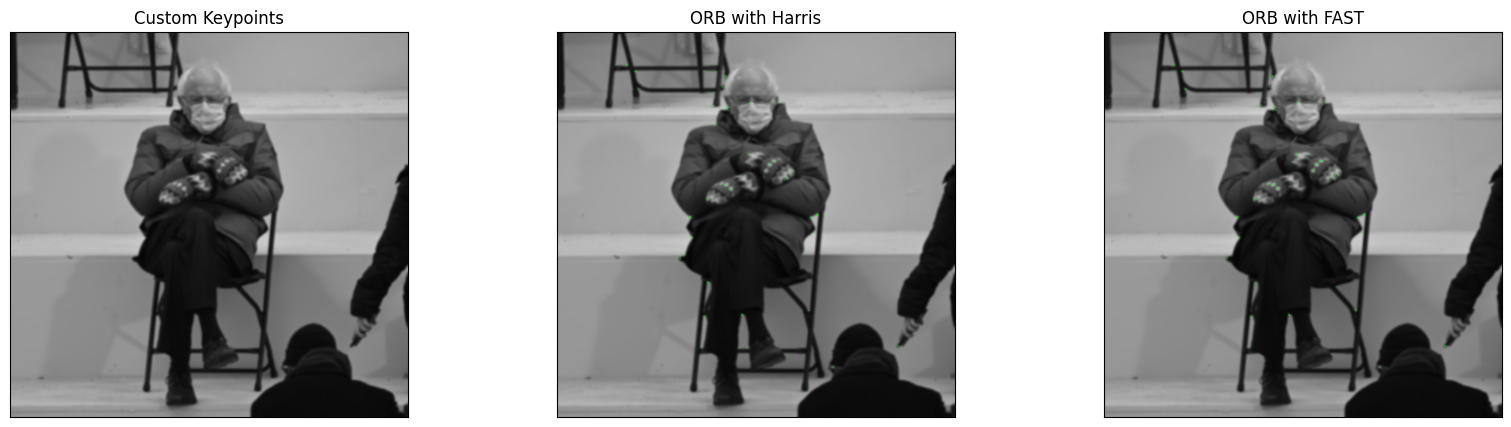

hi


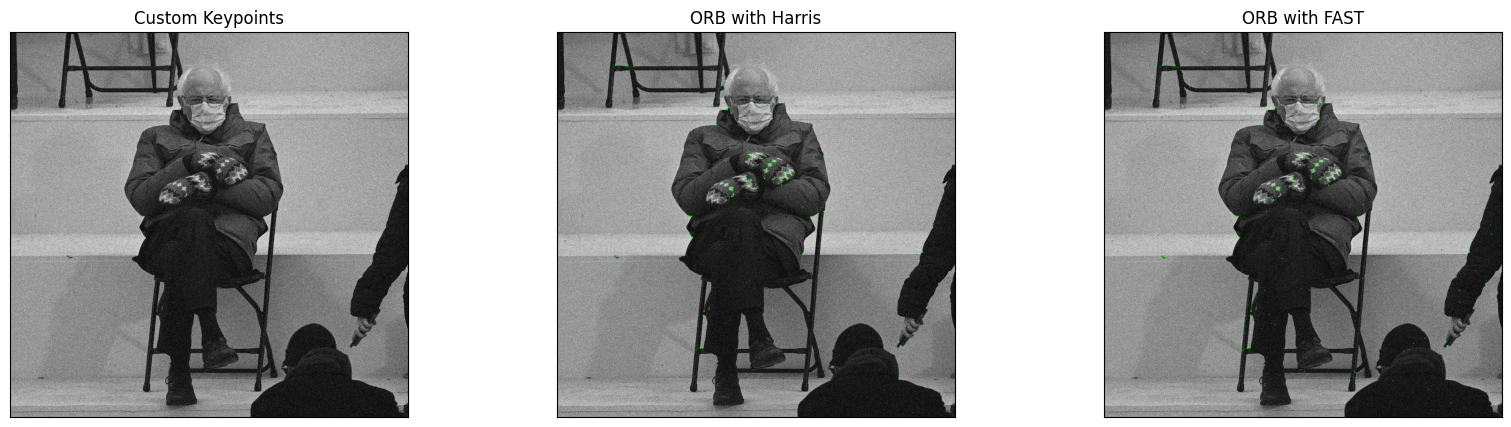

hi


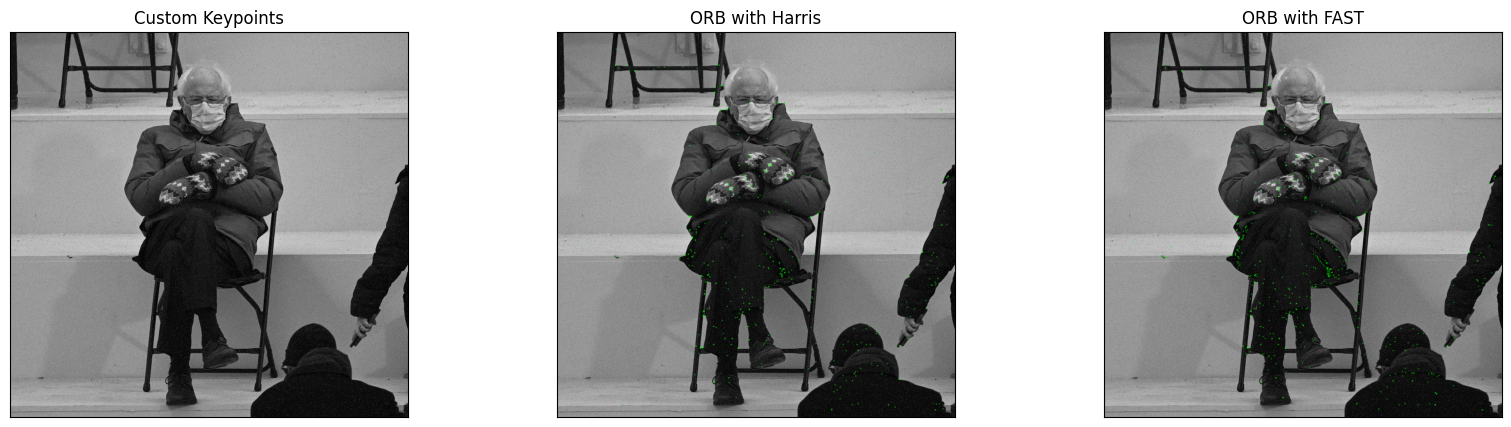

hi


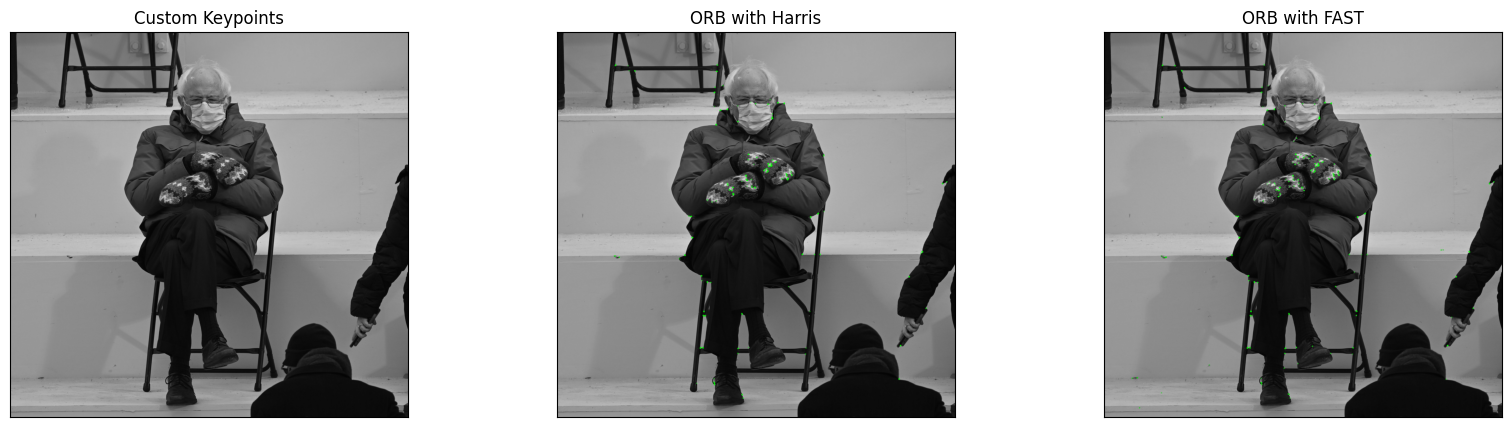

hi


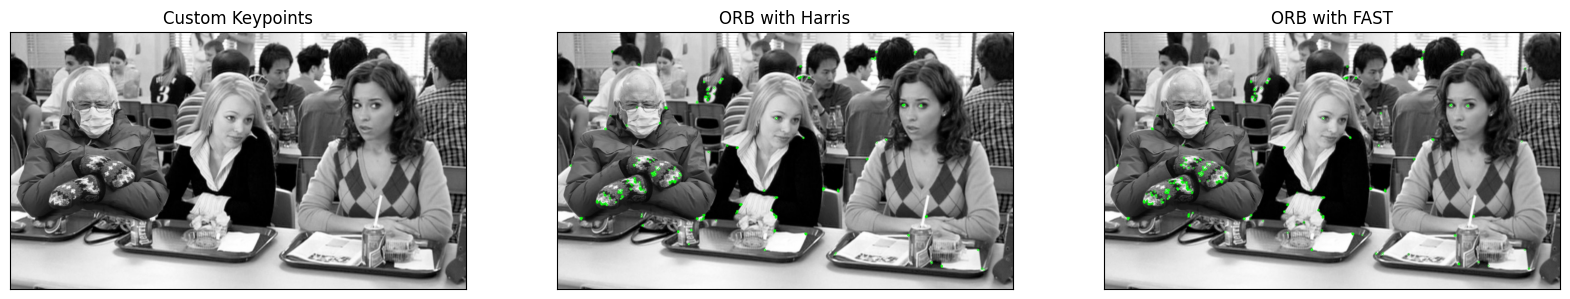

hi


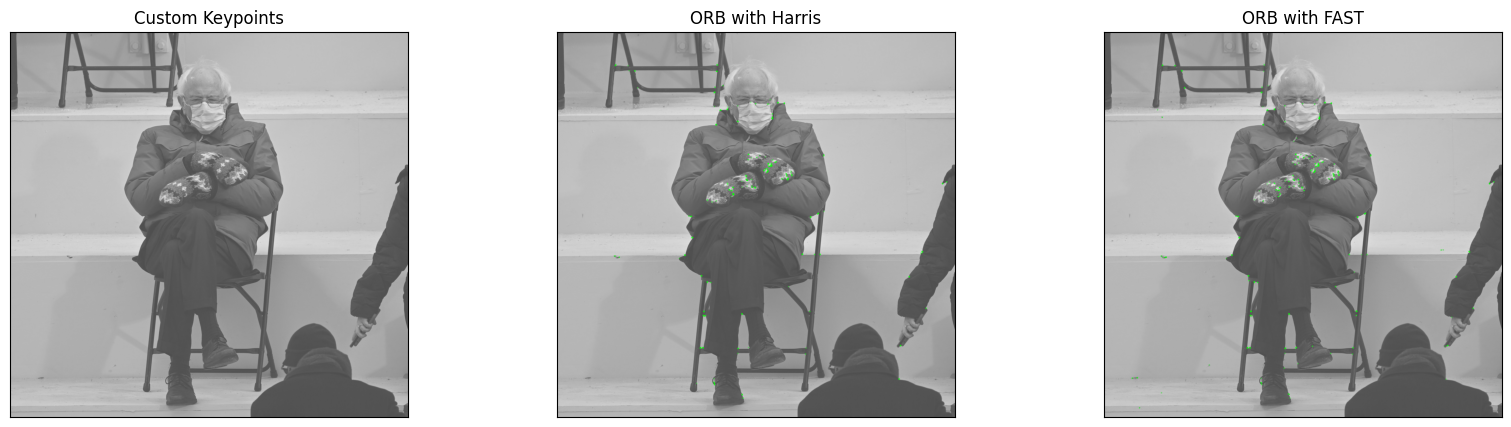

hi


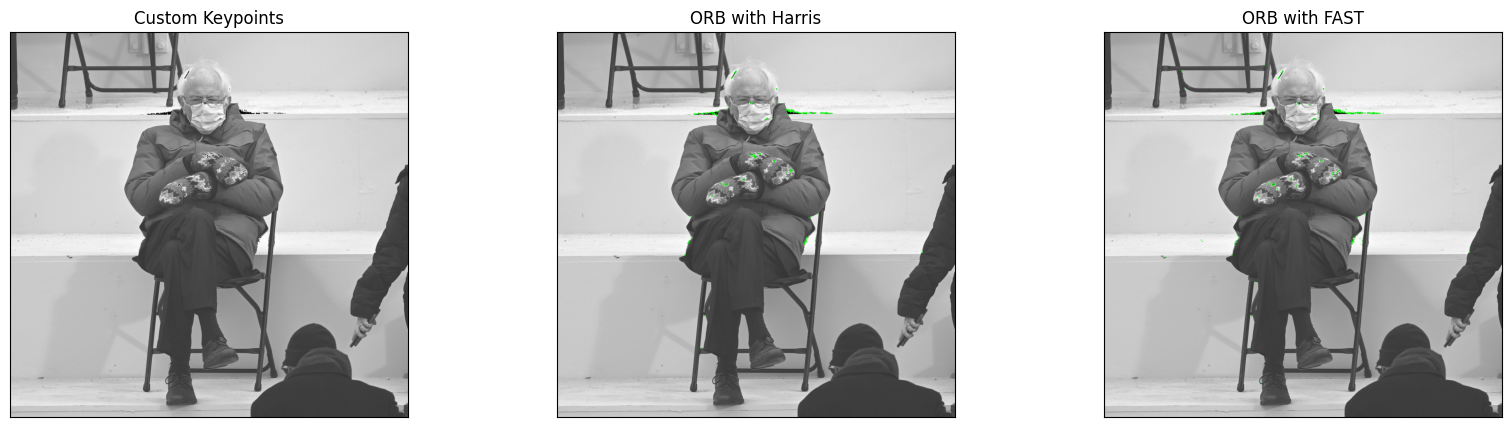

hi


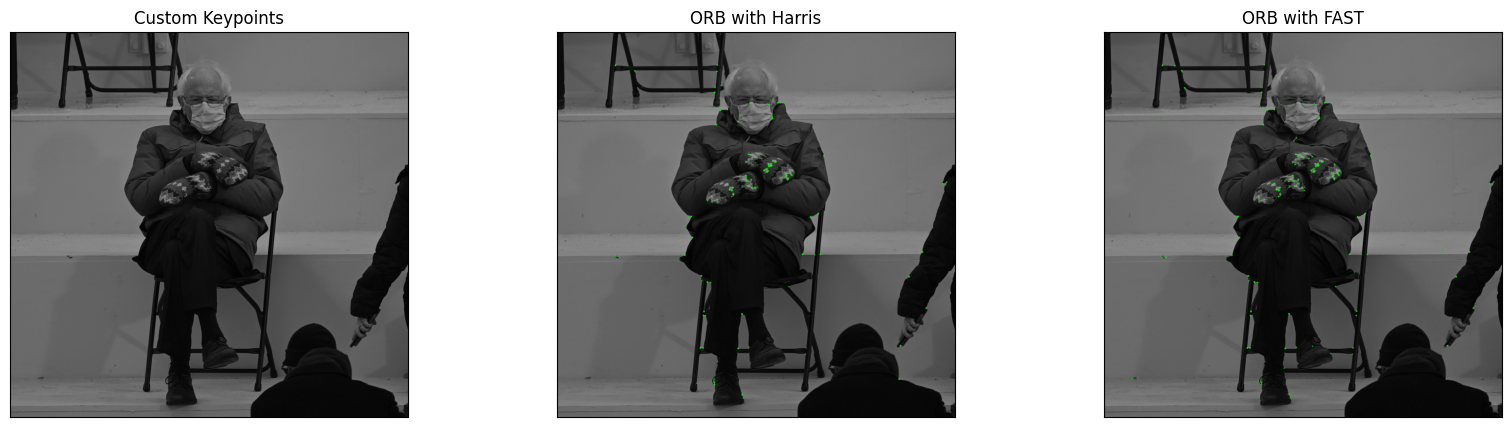

hi


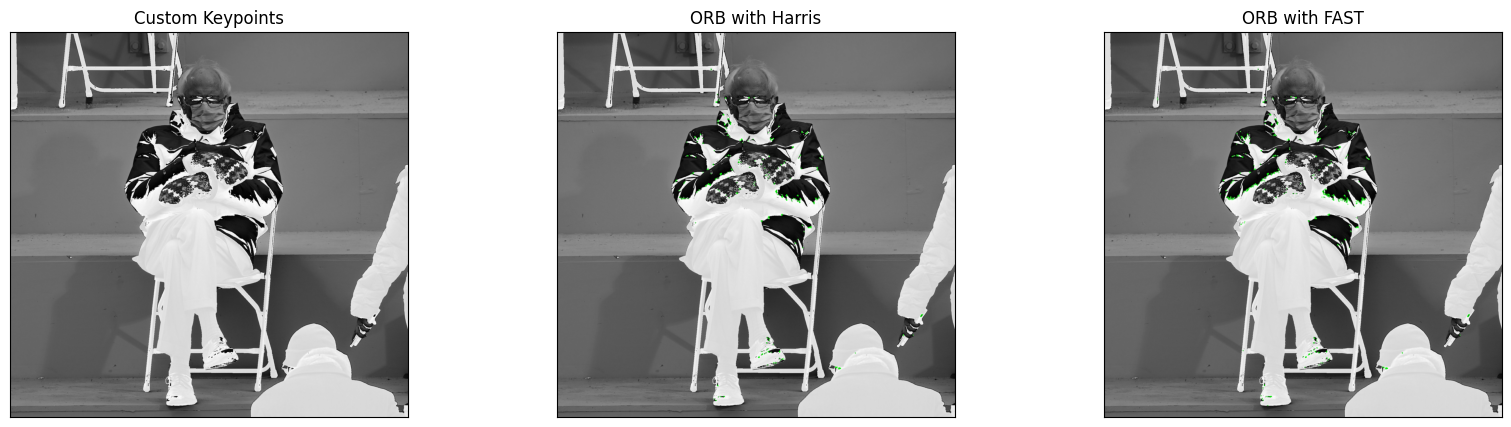

In [26]:
import cv2
import os
import matplotlib.pyplot as plt

def HarrisPointsDetector(img):
    # Implement your Harris corner detection function here
    pass

# Path to the folder containing images
folder_path = "./imgs"
results_folder = "./results"

# Create the results folder if it doesn't exist
if not os.path.exists(results_folder):
    os.makedirs(results_folder)

# List all files in the folder
image_files = os.listdir(folder_path)

# Initialize ORB detector with Harris corners
orb_harris = cv2.ORB_create()

# Initialize ORB detector with FAST corners
orb_fast = cv2.ORB_create(scoreType=cv2.ORB_FAST_SCORE)

for filename in image_files:
    if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):  # Filter image files
        # Read the image
        img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)

        print("hi")


        # Detect Harris corners (replace this with your HarrisPointsDetector function)
        kp_custom = HarrisPointsDetector(img)

        # print(len(kp_custom))

        # Detect keypoints with ORB
        kp_harris = orb_harris.detect(img, None)
        kp_fast = orb_fast.detect(img, None)

        # Compute descriptors with ORB
        kp_harris, des_harris = orb_harris.compute(img, kp_harris)
        kp_fast, des_fast = orb_fast.compute(img, kp_fast)

        # Draw keypoints on the images
        img_custom = cv2.drawKeypoints(img, kp_custom, None, color=(0, 255, 0), flags=0)
        img_harris = cv2.drawKeypoints(img, kp_harris, None, color=(0, 255, 0), flags=0)
        img_fast = cv2.drawKeypoints(img, kp_fast, None, color=(0, 255, 0), flags=0)

        # Save the images
        # cv2.imwrite(os.path.join(results_folder, filename.split('.')[0] + '_custom.jpg'), img_custom)
        # cv2.imwrite(os.path.join(results_folder, filename.split('.')[0] + '_harris.jpg'), img_harris)
        # cv2.imwrite(os.path.join(results_folder, filename.split('.')[0] + '_fast.jpg'), img_fast)

        # Display the images side by side
        plt.figure(figsize=(20, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(img_custom, cmap='gray')
        plt.title('Custom Keypoints')
        plt.xticks([]), plt.yticks([])  # Remove ticks

        plt.subplot(1, 3, 2)
        plt.imshow(img_harris, cmap='gray')
        plt.title('ORB with Harris')
        plt.xticks([]), plt.yticks([])  # Remove ticks

        plt.subplot(1, 3, 3)
        plt.imshow(img_fast, cmap='gray')
        plt.title('ORB with FAST')
        plt.xticks([]), plt.yticks([])  # Remove ticks

        # Save the figure
        plt.savefig(os.path.join(results_folder, filename.split('.')[0] + '_result.png'))

        plt.show()
